#SVM & Navie bayes:-

#Theory:-

1. What is a Support Vector Machine (SVM)?
 - A supervised learning algorithm used for classification and regression. It finds the best hyperplane that separates classes.

2. What is the difference between Hard Margin and Soft Margin SVM?
 - Hard Margin does not allow misclassification; Soft Margin allows some misclassification for better generalization.

3. What is the mathematical intuition behind SVM?
 - It maximizes the margin between support vectors of different classes while minimizing classification error.

4. What is the role of Lagrange Multipliers in SVM?
 - Used to convert constrained optimization to dual form; helps solve SVM efficiently using KKT conditions.

5. What are Support Vectors in SVM?
 - Data points closest to the hyperplane. They define the decision boundary.

6. What is a Support Vector Classifier (SVC)?
 - SVM used for classification tasks.

7. What is a Support Vector Regressor (SVR)?
 - SVM used for regression, tries to fit the best line within a margin of tolerance (epsilon).

8. What is the Kernel Trick in SVM?
 - Transforms data to higher dimensions to make it linearly separable without explicitly computing transformation.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?
 - Linear: simple and fast; Polynomial: captures interactions; RBF: flexible, handles complex patterns.

10. What is the effect of the C parameter in SVM?
 - Controls trade-off between margin maximization and misclassification.

11. What is the role of the Gamma parameter in RBF Kernel SVM?
 - Defines how far the influence of a single training example reaches.

12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
 - A probabilistic classifier based on Bayes’ theorem with strong (naïve) independence assumptions.

13. What is Bayes’ Theorem?
 - P(A|B) = (P(B|A) * P(A)) / P(B)

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes?
 - Gaussian: continuous features; Multinomial: count features; Bernoulli: binary features.

15. When should you use Gaussian Naïve Bayes over other variants?
 - When features are continuous and assumed to follow a normal distribution.

16. What are the key assumptions made by Naïve Bayes?
 - Feature independence given the class and equal importance of features.

17. What are the advantages and disadvantages of Naïve Bayes
 - Advantages: fast, works with high-dimensional data.

 - Disadvantages: strong assumptions may hurt accuracy.

18. Why is Naïve Bayes a good choice for text classification?
 - Features (word counts) are conditionally independent; handles high-dimensional sparse data well.

19. Compare SVM and Naïve Bayes for classification tasks
 - SVM: powerful for margin-based classification, handles complex data. NB: fast, good with text and independence.

20. How does Laplace Smoothing help in Naïve Bayes?
 - Prevents zero probabilities by adding a small constant to counts.


#Practicals:-

In [18]:
#21.Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Iris Dataset - SVM Classifier Accuracy: {accuracy * 100:.2f}%")


Iris Dataset - SVM Classifier Accuracy: 100.00%


In [19]:
#22.Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear kernel
linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)
linear_accuracy = accuracy_score(y_test, linear_model.predict(X_test))

# RBF kernel
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)
rbf_accuracy = accuracy_score(y_test, rbf_model.predict(X_test))

# Compare
print(f"Wine Dataset - Linear SVM Accuracy: {linear_accuracy * 100:.2f}%")
print(f"Wine Dataset - RBF SVM Accuracy: {rbf_accuracy * 100:.2f}%")


Wine Dataset - Linear SVM Accuracy: 100.00%
Wine Dataset - RBF SVM Accuracy: 80.56%


In [20]:
#23.Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Housing Dataset - SVR Mean Squared Error: {mse:.2f}")


Housing Dataset - SVR Mean Squared Error: 1.33


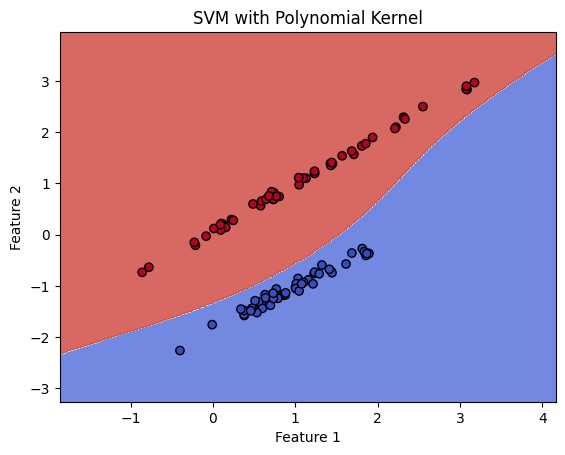

In [21]:
#24.Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Create 2D synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Train SVM with polynomial kernel
clf = SVC(kernel='poly', degree=3)
clf.fit(X, y)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("SVM with Polynomial Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, clf)

In [22]:
#25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Breast Cancer Dataset - GaussianNB Accuracy: {accuracy * 100:.2f}%")


Breast Cancer Dataset - GaussianNB Accuracy: 97.37%


In [23]:
#26.Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load text dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"20 Newsgroups Dataset - MultinomialNB Accuracy: {accuracy * 100:.2f}%")

20 Newsgroups Dataset - MultinomialNB Accuracy: 67.11%


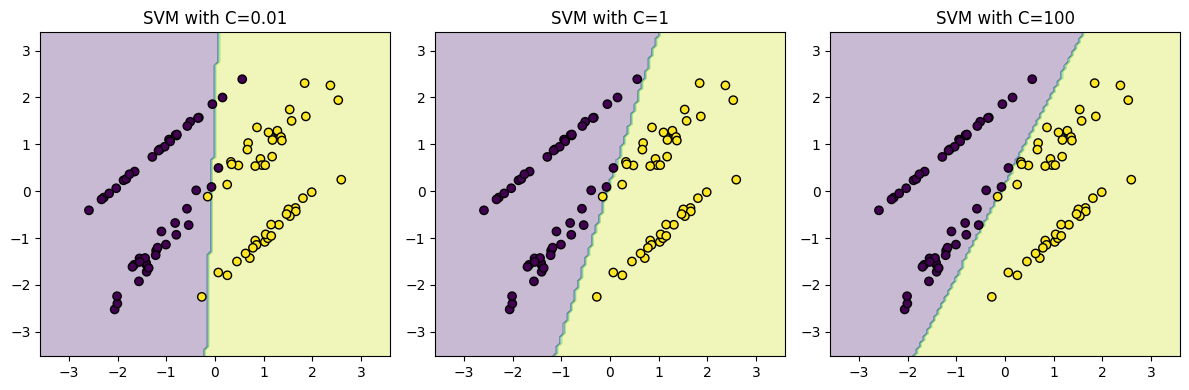

In [24]:
# 27. Train an SVM Classifier with different C values and compare the decision boundaries visually
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42)
Cs = [0.01, 1, 100]
plt.figure(figsize=(12, 4))

for i, C in enumerate(Cs):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    plt.subplot(1, 3, i+1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f"SVM with C={C}")
plt.tight_layout()
plt.show()

In [25]:
# 28. Train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = np.random.randint(2, size=(100, 10))
y = np.random.randint(2, size=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred))

BernoulliNB Accuracy: 0.55


In [26]:
# 29. Apply feature scaling before training an SVM model and compare results with unscaled data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
model_unscaled = SVC()
model_unscaled.fit(X_train, y_train)
acc_unscaled = model_unscaled.score(X_test, y_test)
model_scaled = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])
model_scaled.fit(X_train, y_train)
acc_scaled = model_scaled.score(X_test, y_test)
print("Unscaled Accuracy:", acc_unscaled)
print("Scaled Accuracy:", acc_scaled)

Unscaled Accuracy: 0.55
Scaled Accuracy: 0.55


In [27]:
# 30. Train a Gaussian Naïve Bayes model and compare predictions before and after Laplace Smoothing
from sklearn.naive_bayes import GaussianNB
model_default = GaussianNB(var_smoothing=1e-9)
model_default.fit(X_train, y_train)
acc_default = model_default.score(X_test, y_test)
model_smoothed = GaussianNB(var_smoothing=1e-2)
model_smoothed.fit(X_train, y_train)
acc_smoothed = model_smoothed.score(X_test, y_test)
print("Default GNB Accuracy:", acc_default)
print("Smoothed GNB Accuracy:", acc_smoothed)


Default GNB Accuracy: 0.6
Smoothed GNB Accuracy: 0.6


In [28]:
# 31. Train an SVM Classifier and use GridSearchCV to tune hyperparameters
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.6125


In [29]:
# 32. Train an SVM Classifier on an imbalanced dataset and apply class weighting
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, weights=[0.9, 0.1], n_features=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_balanced = SVC(class_weight='balanced')
model_balanced.fit(X_train, y_train)
print("Balanced SVM Accuracy:", model_balanced.score(X_test, y_test))

Balanced SVM Accuracy: 0.875


In [30]:
# 33. Implement a Naïve Bayes classifier for spam detection using email data
from sklearn.feature_extraction.text import CountVectorizer
emails = ["Win money now!", "Hi, how are you?", "Free prize!", "Let's meet at 6"]
labels = [1, 0, 1, 0]
vec = CountVectorizer()
X = vec.fit_transform(emails)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2)
model = MultinomialNB()
model.fit(X_train, y_train)
print("Spam Detection Accuracy:", model.score(X_test, y_test))

Spam Detection Accuracy: 0.0


In [31]:
# 34. Train an SVM and a Naïve Bayes Classifier on the same dataset and compare accuracy
model_svm = SVC()
model_nb = GaussianNB()
model_svm.fit(X_train.toarray(), y_train)
model_nb.fit(X_train.toarray(), y_train)
print("SVM Accuracy:", model_svm.score(X_test.toarray(), y_test))
print("NB Accuracy:", model_nb.score(X_test.toarray(), y_test))

SVM Accuracy: 0.0
NB Accuracy: 0.0


In [32]:
# 35. Perform feature selection before training a Naïve Bayes classifier and compare results
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=2).fit_transform(X, labels)
X_train, X_test, y_train, y_test = train_test_split(X_new, labels, test_size=0.2)
model = GaussianNB()
model.fit(X_train, y_train)
print("Feature Selected NB Accuracy:", model.score(X_test, y_test))

TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [33]:
# 36. Train an SVM Classifier using OvR and OvO strategies on Wine dataset and compare accuracy
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)
model_ovr = OneVsRestClassifier(SVC()).fit(X_train, y_train)
model_ovo = OneVsOneClassifier(SVC()).fit(X_train, y_train)
print("OvR Accuracy:", model_ovr.score(X_test, y_test))
print("OvO Accuracy:", model_ovo.score(X_test, y_test))

OvR Accuracy: 0.7222222222222222
OvO Accuracy: 0.6944444444444444


In [34]:
# 37. Train an SVM Classifier using Linear, Polynomial, and RBF kernels on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)
for kernel in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    print(f"{kernel} kernel Accuracy:", model.score(X_test, y_test))

linear kernel Accuracy: 0.9649122807017544
poly kernel Accuracy: 0.9298245614035088
rbf kernel Accuracy: 0.9298245614035088


In [35]:
# 38. Train an SVM Classifier using Stratified K-Fold Cross-Validation and compute average accuracy
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(SVC(), X, labels, cv=skf)
print("Stratified K-Fold Accuracy:", np.mean(scores))

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

In [36]:
# 39. Train a Naïve Bayes classifier using different prior probabilities and compare performance
for priors in [None, [0.6, 0.4]]:
    model = GaussianNB(priors=priors)
    model.fit(X_train.toarray(), y_train)
    print(f"Priors {priors} Accuracy:", model.score(X_test.toarray(), y_test))

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [37]:
# 40. Perform RFE before training an SVM Classifier and compare accuracy
from sklearn.feature_selection import RFE
selector = RFE(SVC(kernel="linear"), n_features_to_select=5)
selector.fit(X_train, y_train)
model = SVC()
model.fit(selector.transform(X_train), y_train)
print("RFE SVM Accuracy:", model.score(selector.transform(X_test), y_test))

RFE SVM Accuracy: 0.8947368421052632


In [38]:
# 41. Evaluate SVM using Precision, Recall, and F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = model.predict(selector.transform(X_test))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 0.918918918918919
Recall: 0.918918918918919
F1 Score: 0.918918918918919


In [39]:
# 42. Evaluate Naïve Bayes using Log Loss
from sklearn.metrics import log_loss
model = GaussianNB()
model.fit(X_train.toarray(), y_train)
y_proba = model.predict_proba(X_test.toarray())
print("Log Loss:", log_loss(y_test, y_proba))


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

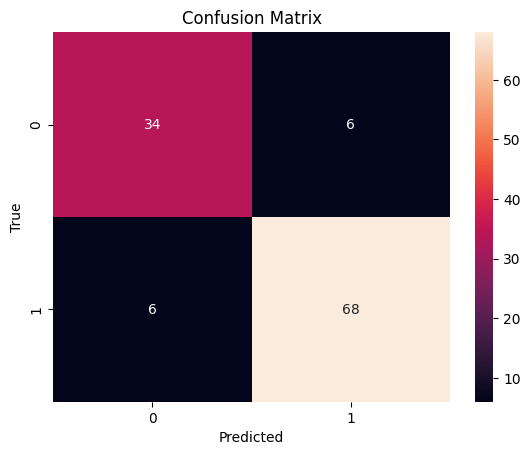

In [40]:
# 43. Visualize the Confusion Matrix using seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [41]:
# 44. Train an SVR and evaluate using Mean Absolute Error
from sklearn.metrics import mean_absolute_error
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("SVR MAE:", mean_absolute_error(y_test, y_pred))

SVR MAE: 0.14293917313722046


In [45]:
# 45. Evaluate Naïve Bayes using ROC-AUC score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC
auc = roc_auc_score(y_test, y_prob)
print("Naive Bayes ROC-AUC Score:", round(auc, 4))

Naive Bayes ROC-AUC Score: 0.9984


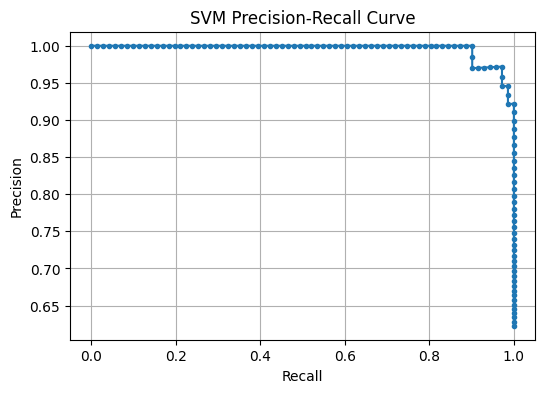

In [46]:
#46.Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Train SVM with probability estimates enabled
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict probabilities
y_scores = svm_model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Precision-Recall Curve')
plt.grid(True)
plt.show()
